## Exercise in Photogrammetry I
## **Ex.4 : Binary Images**

## A. Binary Images and Connected Components *(18 points)*

In this task you will learn how to **convert grayscale** images to **binary** images by applying a certain **thresold**. Finally, based on the binary image we can **identify** which **components** are connected to compute the **number of objects** in the image.

**Tasks:**
1. Load the grayscale image ```shapes.png``` from disk and print its minimum and maximum value. Finally, visualize the grayscale image. *(0.5 points)*
2. Convert the grayscale image to a binary image by applying a threshold of $T=100$. Make sure that all pixels > T have an intensity value of 1 (foreground) and all other pixels have an intensity value of 0 (background). Print the minimum and maximum value of your converted image. Finally, visualize the binary image. *(1.5 points)*
3. In the lecture you discussed two algorithms to identify connected components in a binary image. Implement the *Connected Components for Grids* algorithm and apply it to the previous defined binary image by following each step outlined below:
    - Write a function called ```connected_components(binary_img, neighborhood)``` which computes the *components image* for either *N4 neighborhood* or *N8 neighborhood* **but** does not apply the *equivalence graph* (see *Algorithm 1 in lecture*). Do not use any external python functions which compute the *components image* for you.  *(8 points)*
      <br> **Hint:** Write functions to get the *N4* and *N8 neighborhood* since this operation will be used in other tasks as well
      
    - Apply your function to the binary image and visualize your result for *N4 neighborhood* and *N8 neighborhood*. *(2 points)*
    - Apply the *equivalence graph* to the *components image* and visualize your result for *N4 neighborhood* and *N8 neighborhood*. *(4 points)*
    - Finally, print the number of components in the binary image for *N4 neighborhood* and *N8 neighborhood*. If there is any difference explain why this is the case. *(2 points)*
    

In [1]:
# import all required modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from skimage import io

### A1

In [2]:
# Load the grayscale image
image = io.imread("./images/shapes.png")

In [3]:
# Print the minimum and maximum value of the grayscale image
print("minimum value: ", np.min(image), ", maximum value: ", np.max(image))

minimum value:  0 , maximum value:  180


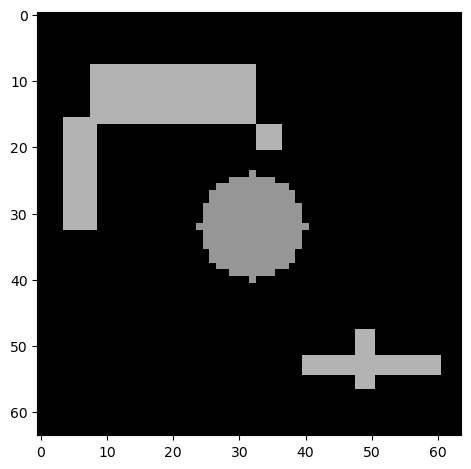

In [4]:
# Visualize the grayscale image
io.imshow(image)
plt.show()

### A2

In [5]:
# Convert the grayscale image to a binary image {0,1}
row = image.shape[1]
col = image.shape[0]
print("Image size: ", row, ", ", col)

binary_image = np.zeros((col, row))
for i in range(row):
    for j in range(col):
        if image[j, i] > 100:
            binary_image[j, i] = 1

Image size:  64 ,  64


In [6]:
# Print the minimum and maximum value of the binary image
print("minimum value: ", np.min(binary_image), ", maximum value: ", np.max(binary_image))

minimum value:  0.0 , maximum value:  1.0


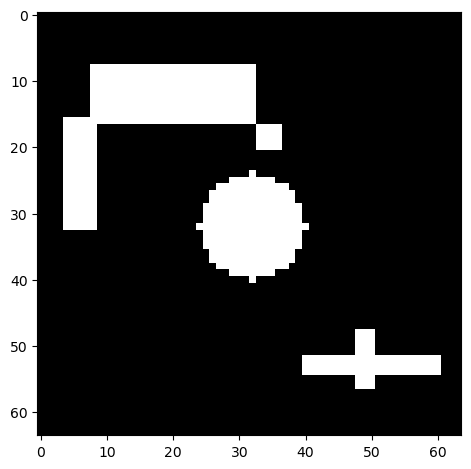

In [7]:
# Visualize the binary image
io.imshow(binary_image)
plt.show()

### A3

In [10]:
# Write a function called connected_components(binary_img, neighborhood)
def connected_components(binary_img, neighborhood):
    """ Find Connected Components.

    Args:
        binary_img (numpy.array, shape = (col, row)): value [0, 1].
        neighborhood (string): n4 or n8.

    Returns:
        CCimage (numpy.array, shape = (col, row)): value [0, 1, ... K].
    """
    
    row = binary_img.shape[1]
    col = binary_img.shape[0]
    
    visited = np.zeros((col, row), dtype=np.uint8)
    CCimage = np.zeros((col, row), dtype=np.uint8)
    index_num = 1
    
    for i in range(col):
        for j in range(row):
            if binary_img[i, j] == 1 and visited[i, j] == 0:
                pos = np.array([i, j])
                #print("O", pos)
                CC_image, visited = update_CCimage(binary_img, CCimage, visited, index_num, pos, neighborhood)
                index_num = index_num + 1
            elif visited[i, j] == 0:
                visited[i, j] = 1
                
    return CCimage
            

def find_neighborhood(binary_img, visited, pos, neighborhood):
    """ Find neighborhooda.

    Args:
        binary_img (numpy.array, shape = (col, row)): value [0, 1].
        visited (numpy.array, shape = (col, row)): value [0, 1].
        pos (numpy,array, shape = (1, 2)).
        neighborhood (string): n4 or n8.

    Returns:
        nh_array (numpy.array, shape = (K, 2)): ex) [[pos_1], [pos_2], ...].
    """
    row = visited.shape[1]
    col = visited.shape[0]
        
    nh_array = np.array([[0, 0]])
    if neighborhood == 'n4':
        if pos[0] > 0:
            nh_array = np.append(nh_array, [[pos[0] - 1, pos[1]]], axis=0)
        if pos[0] < col - 1:
            nh_array = np.append(nh_array, [[pos[0] + 1, pos[1]]], axis=0)
        if pos[1] > 0:
            nh_array = np.append(nh_array, [[pos[0], pos[1] - 1]], axis=0)
        if pos[1] < row - 1:
            nh_array = np.append(nh_array, [[pos[0], pos[1] + 1]], axis=0)
    elif neighborhood == 'n8':
        if pos[0] > 0:
            nh_array = np.append(nh_array, [[pos[0] - 1, pos[1]]], axis=0)
            if pos[1] > 0:
                nh_array = np.append(nh_array, [[pos[0] - 1, pos[1] - 1]], axis=0)
            if pos[1] < row - 1:
                nh_array = np.append(nh_array, [[pos[0] - 1, pos[1] + 1]], axis=0)
        if pos[0] < col - 1:
            nh_array = np.append(nh_array, [[pos[0] + 1, pos[1]]], axis=0)
            if pos[1] > 0:
                nh_array = np.append(nh_array, [[pos[0] + 1, pos[1] - 1]], axis=0)
            if pos[1] < row - 1:
                nh_array = np.append(nh_array, [[pos[0] + 1, pos[1] + 1]], axis=0) 
        if pos[1] > 0:
            nh_array = nh_array = np.append(nh_array, [[pos[0], pos[1] - 1]], axis=0)
        if pos[1] < row - 1:
            nh_array = np.append(nh_array, [[pos[0], pos[1] + 1]], axis=0)
   
    nh_array = np.delete(nh_array, 0, 0)
    delete_ = np.array([], dtype=np.uint8)
    for i in range(len(nh_array)):
        if visited[nh_array[i, 0], nh_array[i, 1]] == 1 or binary_img[nh_array[i, 0], nh_array[i, 1]] == 0:
            delete_ = np.append(delete_, [i])
    nh_array = np.delete(nh_array, delete_, 0)
     
    return nh_array

def update_CCimage(binary_img, CCimage, visited, index_num, pos, neighborhood):
    """ Update Connected componets Image.

    Args:
        binary_img (numpy.array, shape = (col, row)): value [0, 1].
        CCimage (numpy.array, shape = (col, row)): value [0, 1, ... K].
        visited  (numpy.array, shape = (col, row)): value [0, 1].
        index_num (int): 
        pos (numpy,array, shape = (1, 1)).
        neighborhood (string): n4 or n8.
    
    Returns:
        CCimage (numpy.array, shape = (col, row)): value [0, 1, ... K].
        visited  (numpy.array, shape = (col, row)): value [0, 1].
    """
    nh_array = find_neighborhood(binary_img, visited, pos, neighborhood)
    visited[pos[0], pos[1]] = 1
    CCimage[pos[0], pos[1]] = index_num
  
    while len(nh_array) != 0:
        tmp = np.array([nh_array[0, 0], nh_array[0, 1]])
        visited[tmp[0], tmp[1]] = 1
        CCimage[tmp[0], tmp[1]] = index_num
        nh_array = np.delete(nh_array, 0, 0)
        
        nh_array_ = find_neighborhood(binary_img, visited, tmp, neighborhood)
        nh_array = np.append(nh_array, nh_array_, axis=0)
        
        CCimage, visited = update_CCimage(binary_img, CCimage, visited, index_num, tmp, neighborhood)

    return CCimage, visited
    

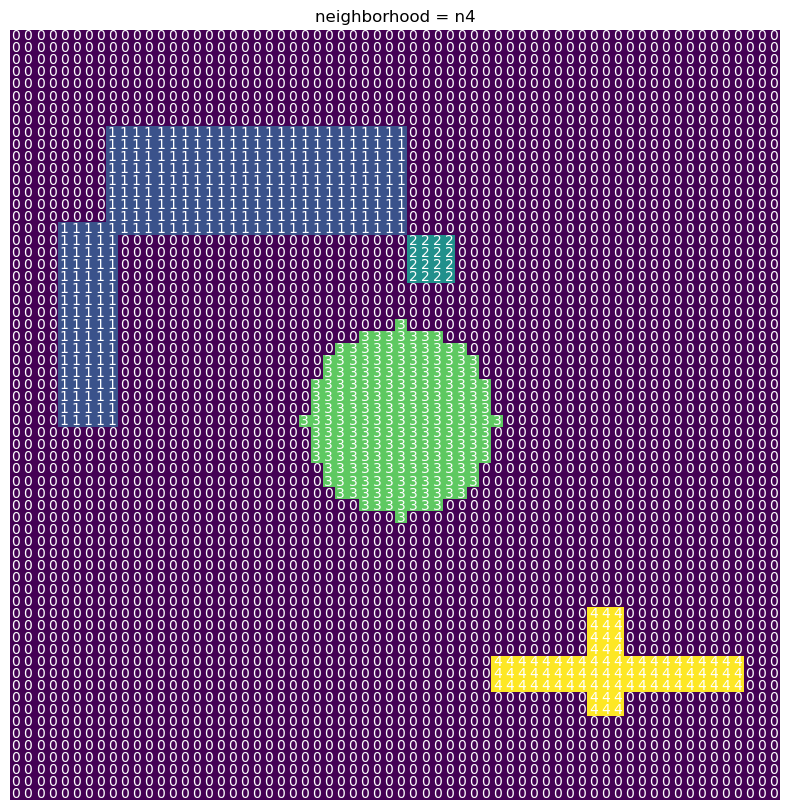

In [96]:
# Compute the components image with N4 Neighborhood and visualize your result
CCimage_n4 = connected_components(binary_image, 'n4')

plt.figure(figsize=(10, 10))
plt.imshow(CCimage_n4)

# Loop over data dimensions and create text annotations.
for i in range(64):
    for j in range(64):
        text = plt.text(j, i, CCimage_n4[i, j],
                       ha="center", va="center", color="w")

plt.title('neighborhood = n4')
plt.axis("off")
plt.show()

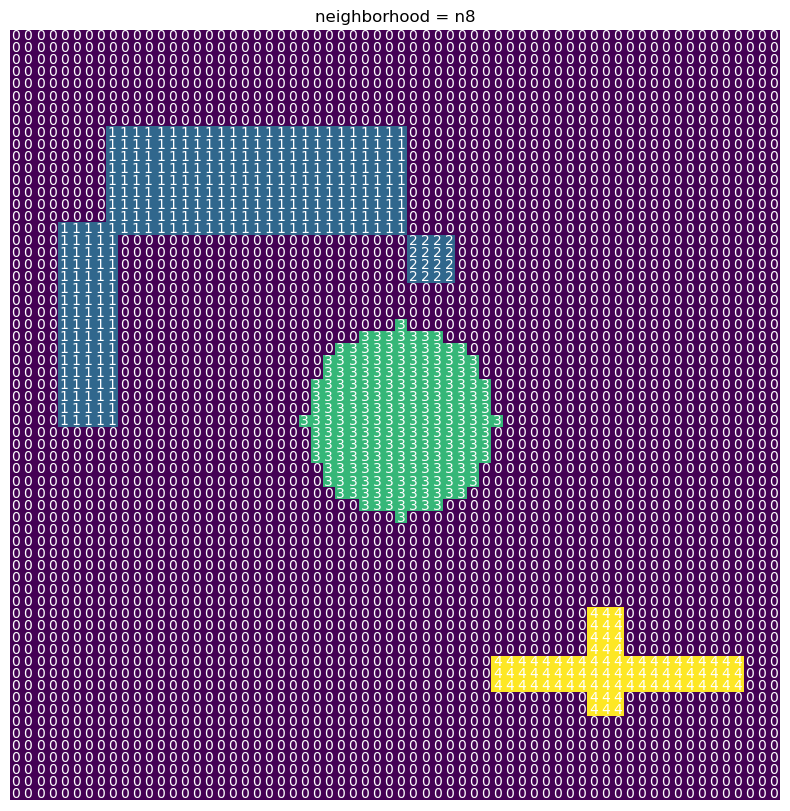

In [98]:
# Compute the components image with N4 Neighborhood and visualize your result
CCimage_n8 = connected_components(binary_image, 'n8')

plt.figure(figsize=(10, 10))
plt.imshow(CCimage_n8)

# Loop over data dimensions and create text annotations.
for i in range(64):
    for j in range(64):
        text = plt.text(j, i, CCimage_n4[i, j],
                       ha="center", va="center", color="w")

plt.title('neighborhood = n8')
plt.axis("off")
plt.show()

In [135]:
def equivalence_graph(binary_image, neighborhood):
    """ Update Connected componets Image Using equivalence graph.

    Args:
        binary_img (numpy.array, shape = (col, row)): value [0, 1].
        neighborhood (string): n4 or n8.
    
    Returns:
        CCimage (numpy.array, shape = (col, row)): value [0, 1, ... K].   
    """
    row = binary_image.shape[1]
    col = binary_image.shape[0]
    
    CCimage = np.zeros((col, row), dtype=np.uint8)
    equivalence_graph_ = {}
    index_num = 0
    
    for i in range(col):
        for j in range(row):
            if binary_image[i, j] == 1:
                if index_num == 0:
                    index_num = index_num + 1
                    CCimage[i, j] = index_num
                    equivalence_graph_[1] = 1
                else:
                    CCimage[i, j], index_num = equivalence_graph_neighborhood(CCimage, neighborhood, equivalence_graph_, i, j, index_num)
    
    return CCimage, equivalence_graph_
               


def equivalence_graph_neighborhood(CCimage, neighborhood, equivalence_graph_, col, row, index_num):
    """ Find neighborhooda.

    Args:
        CCimage (numpy.array, shape = (col, row)): value [0, 1, ... K].
        neighborhood (string): n4 or n8.
        equivalence_graph_ (dict): {index : neighborhood index}
        col (int)
        row (int)
        index_num (int): current index        

    Returns:
        index_(int): current index
        index_num (int): max index
    """
    if neighborhood == 'n4':
        up_col = col - 1
        if up_col < 0:
            up_index = 0
        else:
            up_index = CCimage[up_col, row]
            
        left_row = row - 1
        if left_row < 0:
            left_index = 0
        else:
            left_index = CCimage[col, left_row]
        
        if (up_index == 0 and left_index == 0):
            index_num = index_num + 1
            index_ = index_num
            equivalence_graph_[index_] = index_num
        elif(up_index == 0 or left_index == 0):
            index_ = max(up_index, left_index)
        else:
            index_ = max(up_index, left_index)
            if equivalence_graph_[index_] > min(up_index, left_index):
                equivalence_graph_[index_] = min(up_index, left_index)
            
    elif neighborhood == 'n8':
        up_col = col - 1
        if up_col < 0:
            up_index = 0
        else:
            up_index = CCimage[up_col, row]
            
        left_row = row - 1
        if left_row < 0:
            left_index = 0
        else:
            left_index = CCimage[col, left_row]
            
        left_up_col = col - 1
        left_up_row = row - 1
        if left_up_col < 0 or left_up_row < 0:
            left_up_index = 0
        else:
            left_up_index = CCimage[left_up_col, left_up_row]
        
        if (up_index == 0 and left_index == 0 and left_up_index == 0):
            index_num = index_num + 1
            index_ = index_num
            equivalence_graph_[index_] = index_num
        else:
            indexes = []
            if up_index != 0:
                indexes.append(up_index)
            if left_index != 0:
                indexes.append(left_index)
            if left_up_index != 0:
                indexes.append(left_up_index)
            index_ = max(indexes)
            if equivalence_graph_[index_] > min(indexes):
                equivalence_graph_[index_] = min(indexes)
        
    return index_, index_num

Equivalnce graph n4:  {1: 1, 2: 1, 3: 3, 4: 4, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 10, 11: 10}


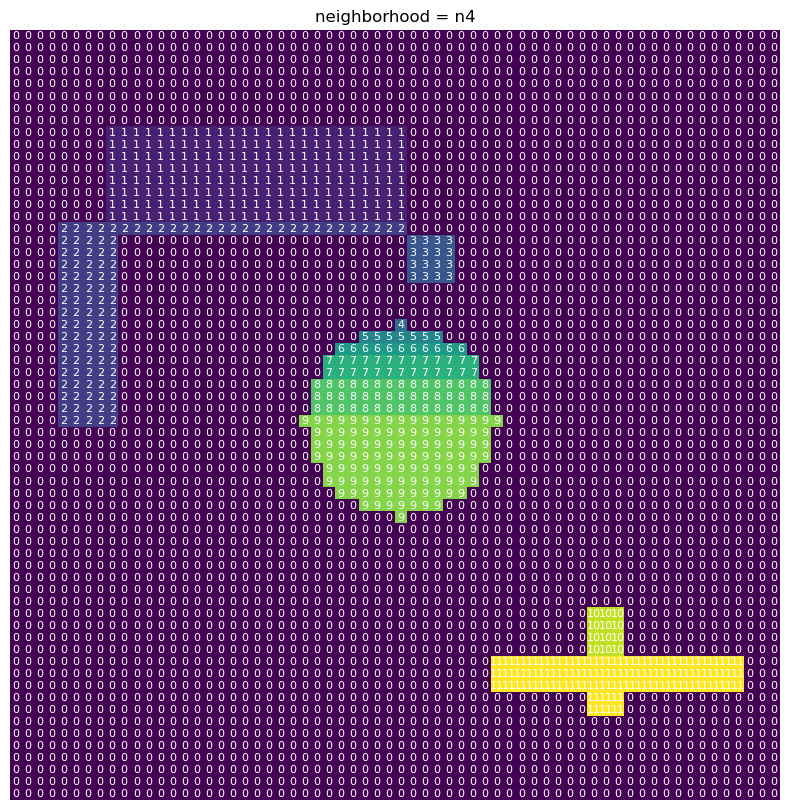

In [151]:
# Compute the components image with N4 Neighborhood and visualize your result
CCimage_n4_equivalence_graph, equivalence_graph_n4 = equivalence_graph(binary_image, 'n4')
print("Equivalnce graph n4: ", equivalence_graph_n4)
plt.figure(figsize=(10, 10))
plt.imshow(CCimage_n4_equivalence_graph)

# Loop over data dimensions and create text annotations.
for i in range(64):
    for j in range(64):
        text = plt.text(j, i, CCimage_n4_equivalence_graph[i, j],
                       ha="center", va="center", color="w", fontsize=8)

plt.title('neighborhood = n4')
plt.axis("off")
plt.show()

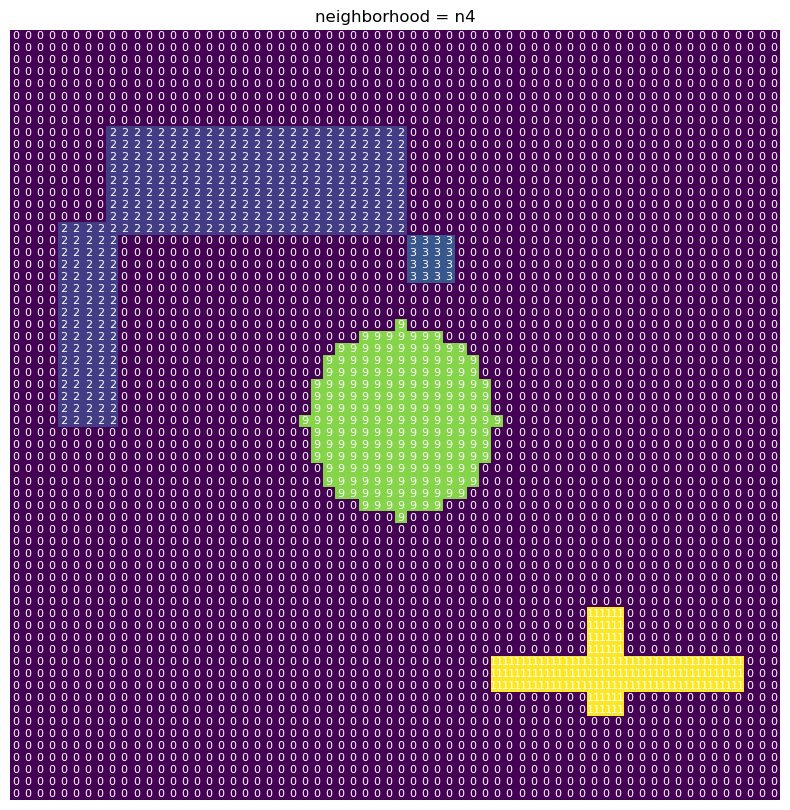

In [152]:
#  USE equivalence graph - n4
for key, value in equivalence_graph_n4.items():
    CCimage_n4_equivalence_graph = np.where(CCimage_n4_equivalence_graph == value, key, CCimage_n4_equivalence_graph)
    
plt.figure(figsize=(10, 10))
plt.imshow(CCimage_n4_equivalence_graph)

# Loop over data dimensions and create text annotations.
for i in range(64):
    for j in range(64):
        text = plt.text(j, i, CCimage_n4_equivalence_graph[i, j],
                       ha="center", va="center", color="w", fontsize=8)

plt.title('neighborhood = n4')
plt.axis("off")
plt.show()

{1: 1, 2: 1, 3: 3, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 9, 10: 9}


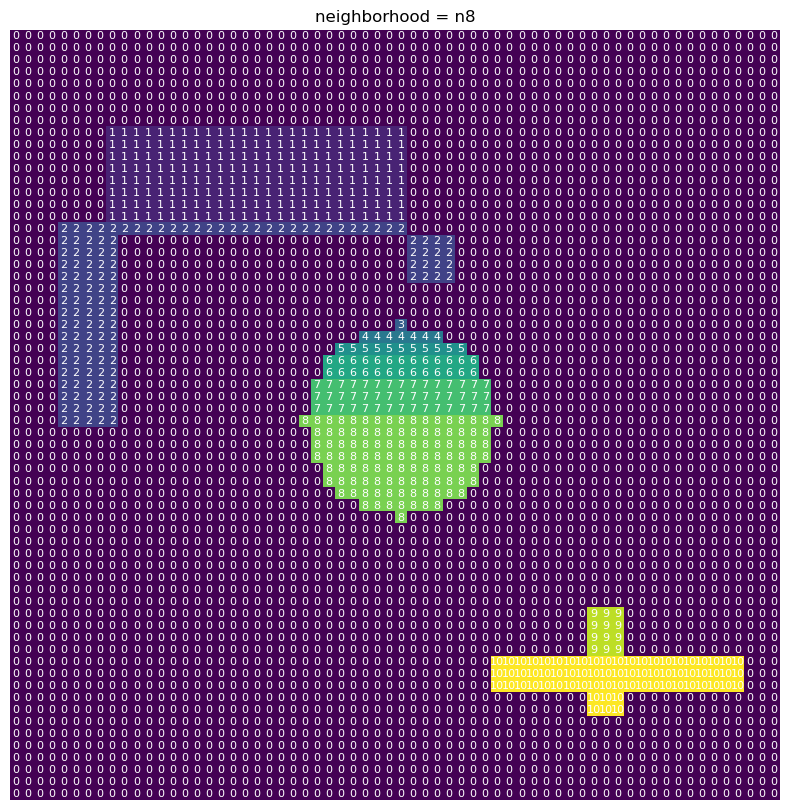

In [153]:
# Compute the components image with N8 Neighborhood and visualize your result
CCimage_n8_equivalence_graph, equivalence_graph_n8 = equivalence_graph(binary_image, 'n8')
print(equivalence_graph_n8)
plt.figure(figsize=(10, 10))
plt.imshow(CCimage_n8_equivalence_graph)

# Loop over data dimensions and create text annotations.
for i in range(64):
    for j in range(64):
        text = plt.text(j, i, CCimage_n8_equivalence_graph[i, j],
                       ha="center", va="center", color="w", fontsize=8)

plt.title('neighborhood = n8')
plt.axis("off")
plt.show()

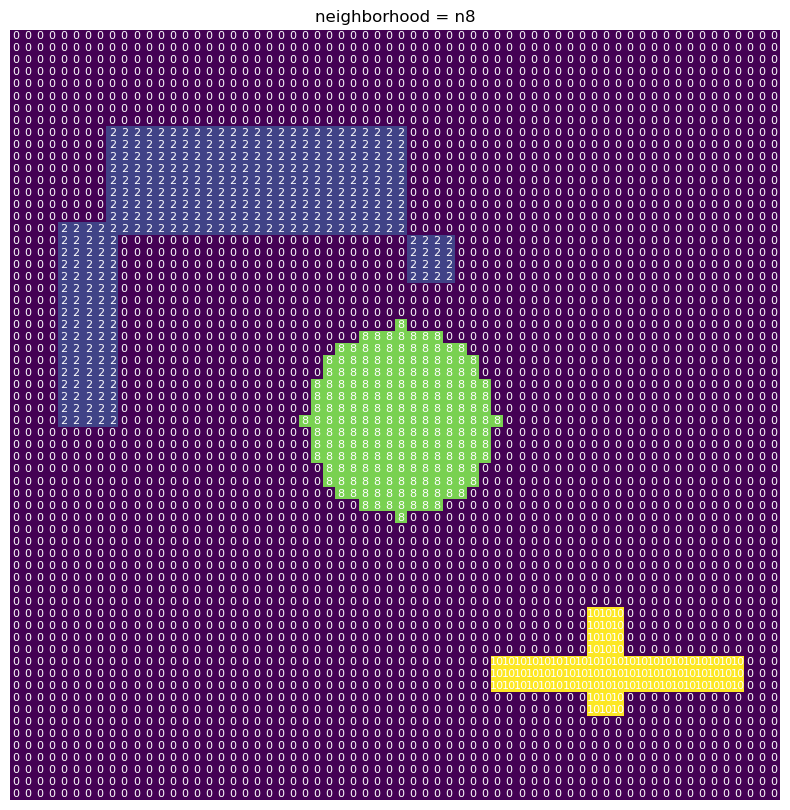

In [154]:
#  USE equivalence graph - n8
for key, value in equivalence_graph_n8.items():
    CCimage_n8_equivalence_graph = np.where(CCimage_n8_equivalence_graph == value, key, CCimage_n8_equivalence_graph)
    
plt.figure(figsize=(10, 10))
plt.imshow(CCimage_n8_equivalence_graph)

# Loop over data dimensions and create text annotations.
for i in range(64):
    for j in range(64):
        text = plt.text(j, i, CCimage_n8_equivalence_graph[i, j],
                       ha="center", va="center", color="w", fontsize=8)

plt.title('neighborhood = n8')
plt.axis("off")
plt.show()

## B. Morphological Operations and Distance Transformation *(12 points)*

In the lecture your discussed *Morphological Operators* to expand and shrink the foreground of binary images as well as the *Distance Transformation* to compute the distance from any pixel to the border of the components.

**Tasks:**
1. Implement the *Distance Transformation* algorithm and apply it to the previous defined binary image (*A2*) by following each step outlined below:
    - Write a function called ```distance_transformation(binary_img, neighborhood)``` which computes the *distance image* for either *N4 neighborhood* or *N8 neighborhood*. Do not use any external python functions which compute the *distance image* for you. *(5 points)*
    - Apply your function to the binary image and visualize your result for *N4 neighborhood* and *N8 neighborhood*. *(2 points)*
    
2. Apply a *Dilation* to the binary image by using the the ```skimage.morphology``` module ([link](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.dilation))
    - Follow the steps provided by the [example](https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.dilation) to dilate the binary image *(2 points)*
    - Visualize your results and describe your observations *(1 point)*
    
3. Finally, apply the *Distance Transformation* with N4 neighborhood to the dilated binary image and visualize your result. *(2 points)*

### B1

In [66]:
# Write a function called distance_transformation(binary_img, neighborhood) to compute the distance matrix
def distance_transformation(binary_img, neighborhood):
    """ distance transformation.

    Args:
        binary_img (numpy.array, shape = (col, row)): value [0, 1].
        neighborhood (string): n4 or n8.
    
    Returns:
        result_image (numpy.array, shape = (col, row)): value [0, 1, ... K].   
    """
    row = binary_image.shape[1]
    col = binary_image.shape[0]
    
    result_image = np.zeros((col, row), dtype=np.uint8)
    
    if neighborhood == 'n4':
        # left -> right, top -> down
        for y in range(col):
            for x in range(row):
                if binary_image[y, x] == 1:
                    up_y = y - 1
                    if up_y < 0:
                        up_distance = 0
                    else:
                        up_distance = result_image[up_y, x]
                    
                    left_x = x - 1
                    if left_x < 0:
                        left_distance = 0
                    else:
                        left_distance = result_image[y, left_x]
                        
                    result_image[y, x] = min(up_distance, left_distance) + 1
        # right -> left, down -> up
        for y in reversed(range(col)):
            for x in reversed(range(row)):
                if binary_image[y, x] == 1:
                    down_y = y + 1
                    if down_y > col-1:
                        down_distance = 0
                    else:
                        down_distance = result_image[down_y, x]
                    
                    right_x = x + 1
                    if right_x > row-1:
                        right_distance = 0
                    else:
                        right_distance = result_image[y, right_x]  
                    result_image[y, x] = min(min(down_distance, right_distance) + 1, result_image[y, x])   
                    
    elif neighborhood == 'n8':
        # left -> right, top -> down
        for y in range(col):
            for x in range(row):
                if binary_image[y, x] == 1:
                    up_y = y - 1
                    if up_y < 0:
                        up_distance = 0
                    else:
                        up_distance = result_image[up_y, x]
                    
                    left_x = x - 1
                    if left_x < 0:
                        left_distance = 0
                    else:
                        left_distance = result_image[y, left_x]
                        
                    left_up_x = x - 1
                    left_up_y = y - 1
                    if left_up_x < 0 or left_up_y < 0:
                        left_up_distance = 0
                    else:
                        left_up_distance = result_image[left_up_y, left_up_x]
                    
                    right_up_x = x + 1
                    right_up_y = y - 1
                    if right_up_x > row-1 or right_up_y < 0:
                        right_up_distance = 0
                    else:
                        right_up_distance = result_image[right_up_y, right_up_x]
                    result_image[y, x] = min(min(min(up_distance, left_distance), left_up_distance), right_up_distance) + 1
        # right -> left, down -> up
        for y in reversed(range(col)):
            for x in reversed(range(row)):
                if binary_image[y, x] == 1:
                    down_y = y + 1
                    if down_y > col-1:
                        down_distance = 0
                    else:
                        down_distance = result_image[down_y, x]
                    
                    right_x = x + 1
                    if right_x > row-1:
                        right_distance = 0
                    else:
                        right_distance = result_image[y, right_x]
                    
                    right_down_x = x + 1
                    right_down_y = y + 1
                    if right_down_x > row-1 or right_down_y > col-1:
                        right_down_distance = 0
                    else:
                        right_down_distance = result_image[right_down_y, right_down_x]
                    
                    left_down_x = x - 1
                    left_down_y = y + 1
                    if left_down_x < 0 or left_down_y > col-1:
                        left_down_distance = 0
                    else:
                        left_down_distance = result_image[left_down_y, left_down_x]
                        
                    result_image[y, x] = min(min(min(min(down_distance, right_distance), right_down_distance), left_down_distance) + 1, result_image[y, x]) 
    
    return result_image

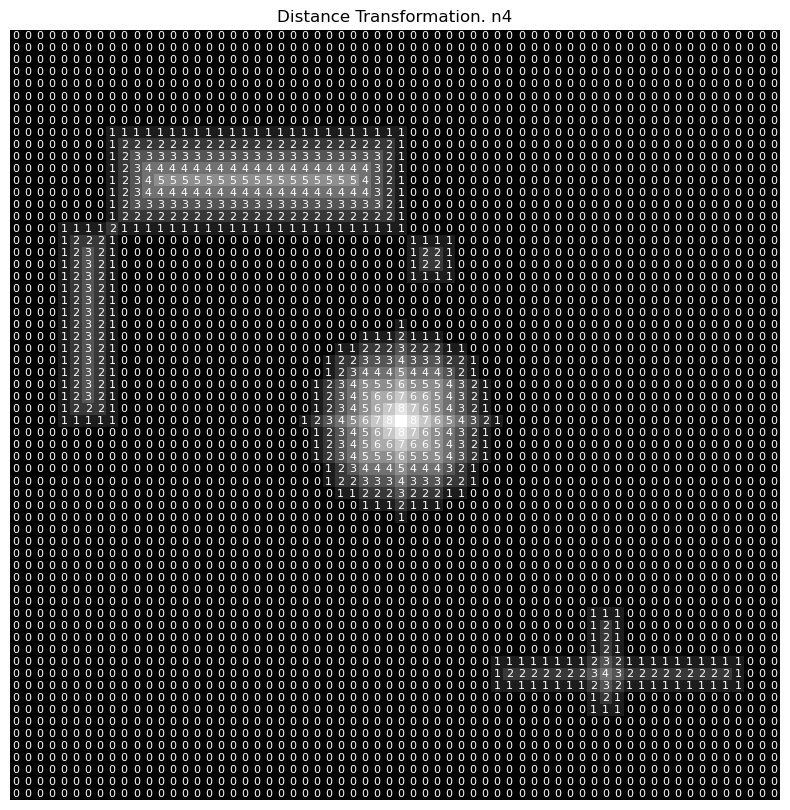

In [67]:
# Compute the distance matrix with N4 Neighborhood and visualize your result
# n4
distance_tranformation_n4 = distance_transformation(binary_image, 'n4')
plt.figure(figsize=(10, 10))
plt.imshow(distance_tranformation_n4, cmap='gray')

# Loop over data dimensions and create text annotations.
for i in range(64):
    for j in range(64):
        text = plt.text(j, i, distance_tranformation_n4[i, j],
                       ha="center", va="center", color="w", fontsize=8)

plt.title('Distance Transformation. n4')
plt.axis("off")
plt.show()

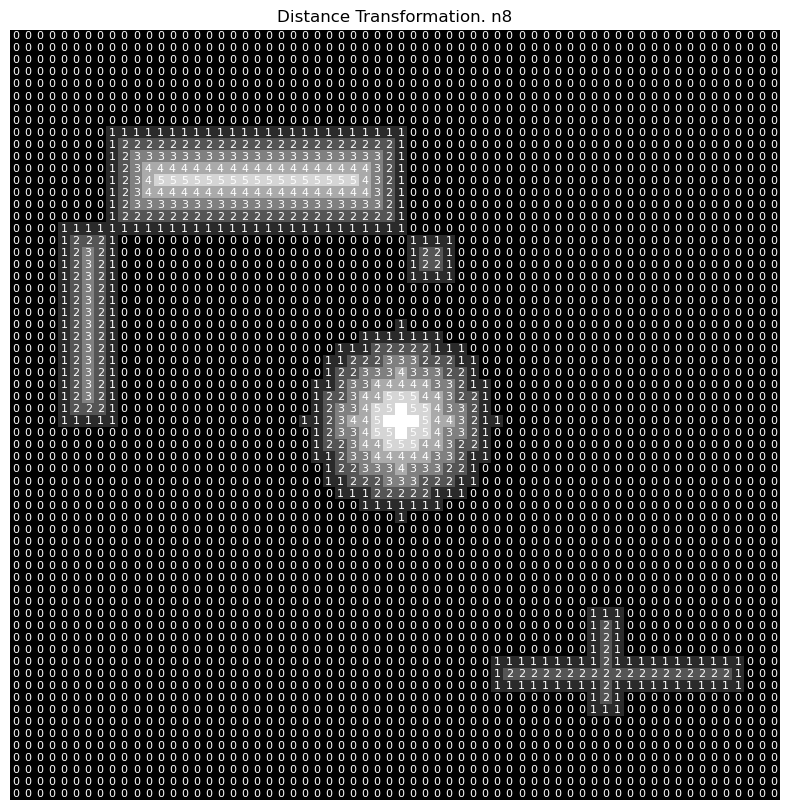

In [69]:
# Compute the distance matrix with N8 Neighborhood and visualize your result
# n4
distance_tranformation_n8 = distance_transformation(binary_image, 'n8')
plt.figure(figsize=(10, 10))
plt.imshow(distance_tranformation_n8, cmap='gray')

# Loop over data dimensions and create text annotations.
for i in range(64):
    for j in range(64):
        text = plt.text(j, i, distance_tranformation_n8[i, j],
                       ha="center", va="center", color="w", fontsize=8)

plt.title('Distance Transformation. n8')
plt.axis("off")
plt.show()

### B2

In [ ]:
# Apply a Dilation to the binary image


In [ ]:
# Visualize the dilated binary image


**Explain your observations here**


### B3

In [ ]:
# Compute the distance matrix with N4 Neighborhood of the dilated binary image


In [ ]:
# Visualze the corresponding distance matrix
